In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
#dataset courtesy of Kaggle.com: https://www.kaggle.com/zaurbegiev/my-dataset

df = pd.read_csv(r"C:\Users\bryan\Desktop\credit_train.csv")

In [3]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10 years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [4]:
#drop unessessary columns

df.drop(labels=['Loan ID', 'Customer ID','Months since last delinquent'], axis=1, inplace=True)

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.100000e+05,88865.000000,8.886500e+04,110000.000000,110000.000000,110000.000000,110000.000000,1.100000e+05,1.099980e+05,109774.000000,109989.000000
mean,1.174621e+07,1076.594644,1.377449e+06,18468.526823,18.202485,11.124491,0.168055,2.942822e+05,7.541012e+05,0.117614,0.029448
std,3.176716e+07,1475.581902,1.063920e+06,12195.564391,7.015575,5.011093,0.484389,3.772773e+05,8.014002e+06,0.351290,0.261054
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.795860e+05,705.000000,8.488440e+05,10211.930000,13.500000,8.000000,0.000000,1.121950e+05,2.731575e+05,0.000000,0.000000
50%,3.120260e+05,724.000000,1.173459e+06,16202.440000,16.900000,10.000000,0.000000,2.096650e+05,4.673900e+05,0.000000,0.000000
75%,5.239300e+05,741.000000,1.651670e+06,23997.522500,21.700000,14.000000,0.000000,3.674838e+05,7.831945e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                110000 non-null  object 
 1   Current Loan Amount        110000 non-null  int64  
 2   Term                       110000 non-null  object 
 3   Credit Score               88865 non-null   float64
 4   Annual Income              88865 non-null   float64
 5   Years in current job       105351 non-null  object 
 6   Home Ownership             110000 non-null  object 
 7   Purpose                    110000 non-null  object 
 8   Monthly Debt               110000 non-null  float64
 9   Years of Credit History    110000 non-null  float64
 10  Number of Open Accounts    110000 non-null  int64  
 11  Number of Credit Problems  110000 non-null  int64  
 12  Current Credit Balance     110000 non-null  int64  
 13  Maximum Open Credit        10

In [7]:
len(df)

110000

In [8]:
df.dtypes

Loan Status                   object
Current Loan Amount            int64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

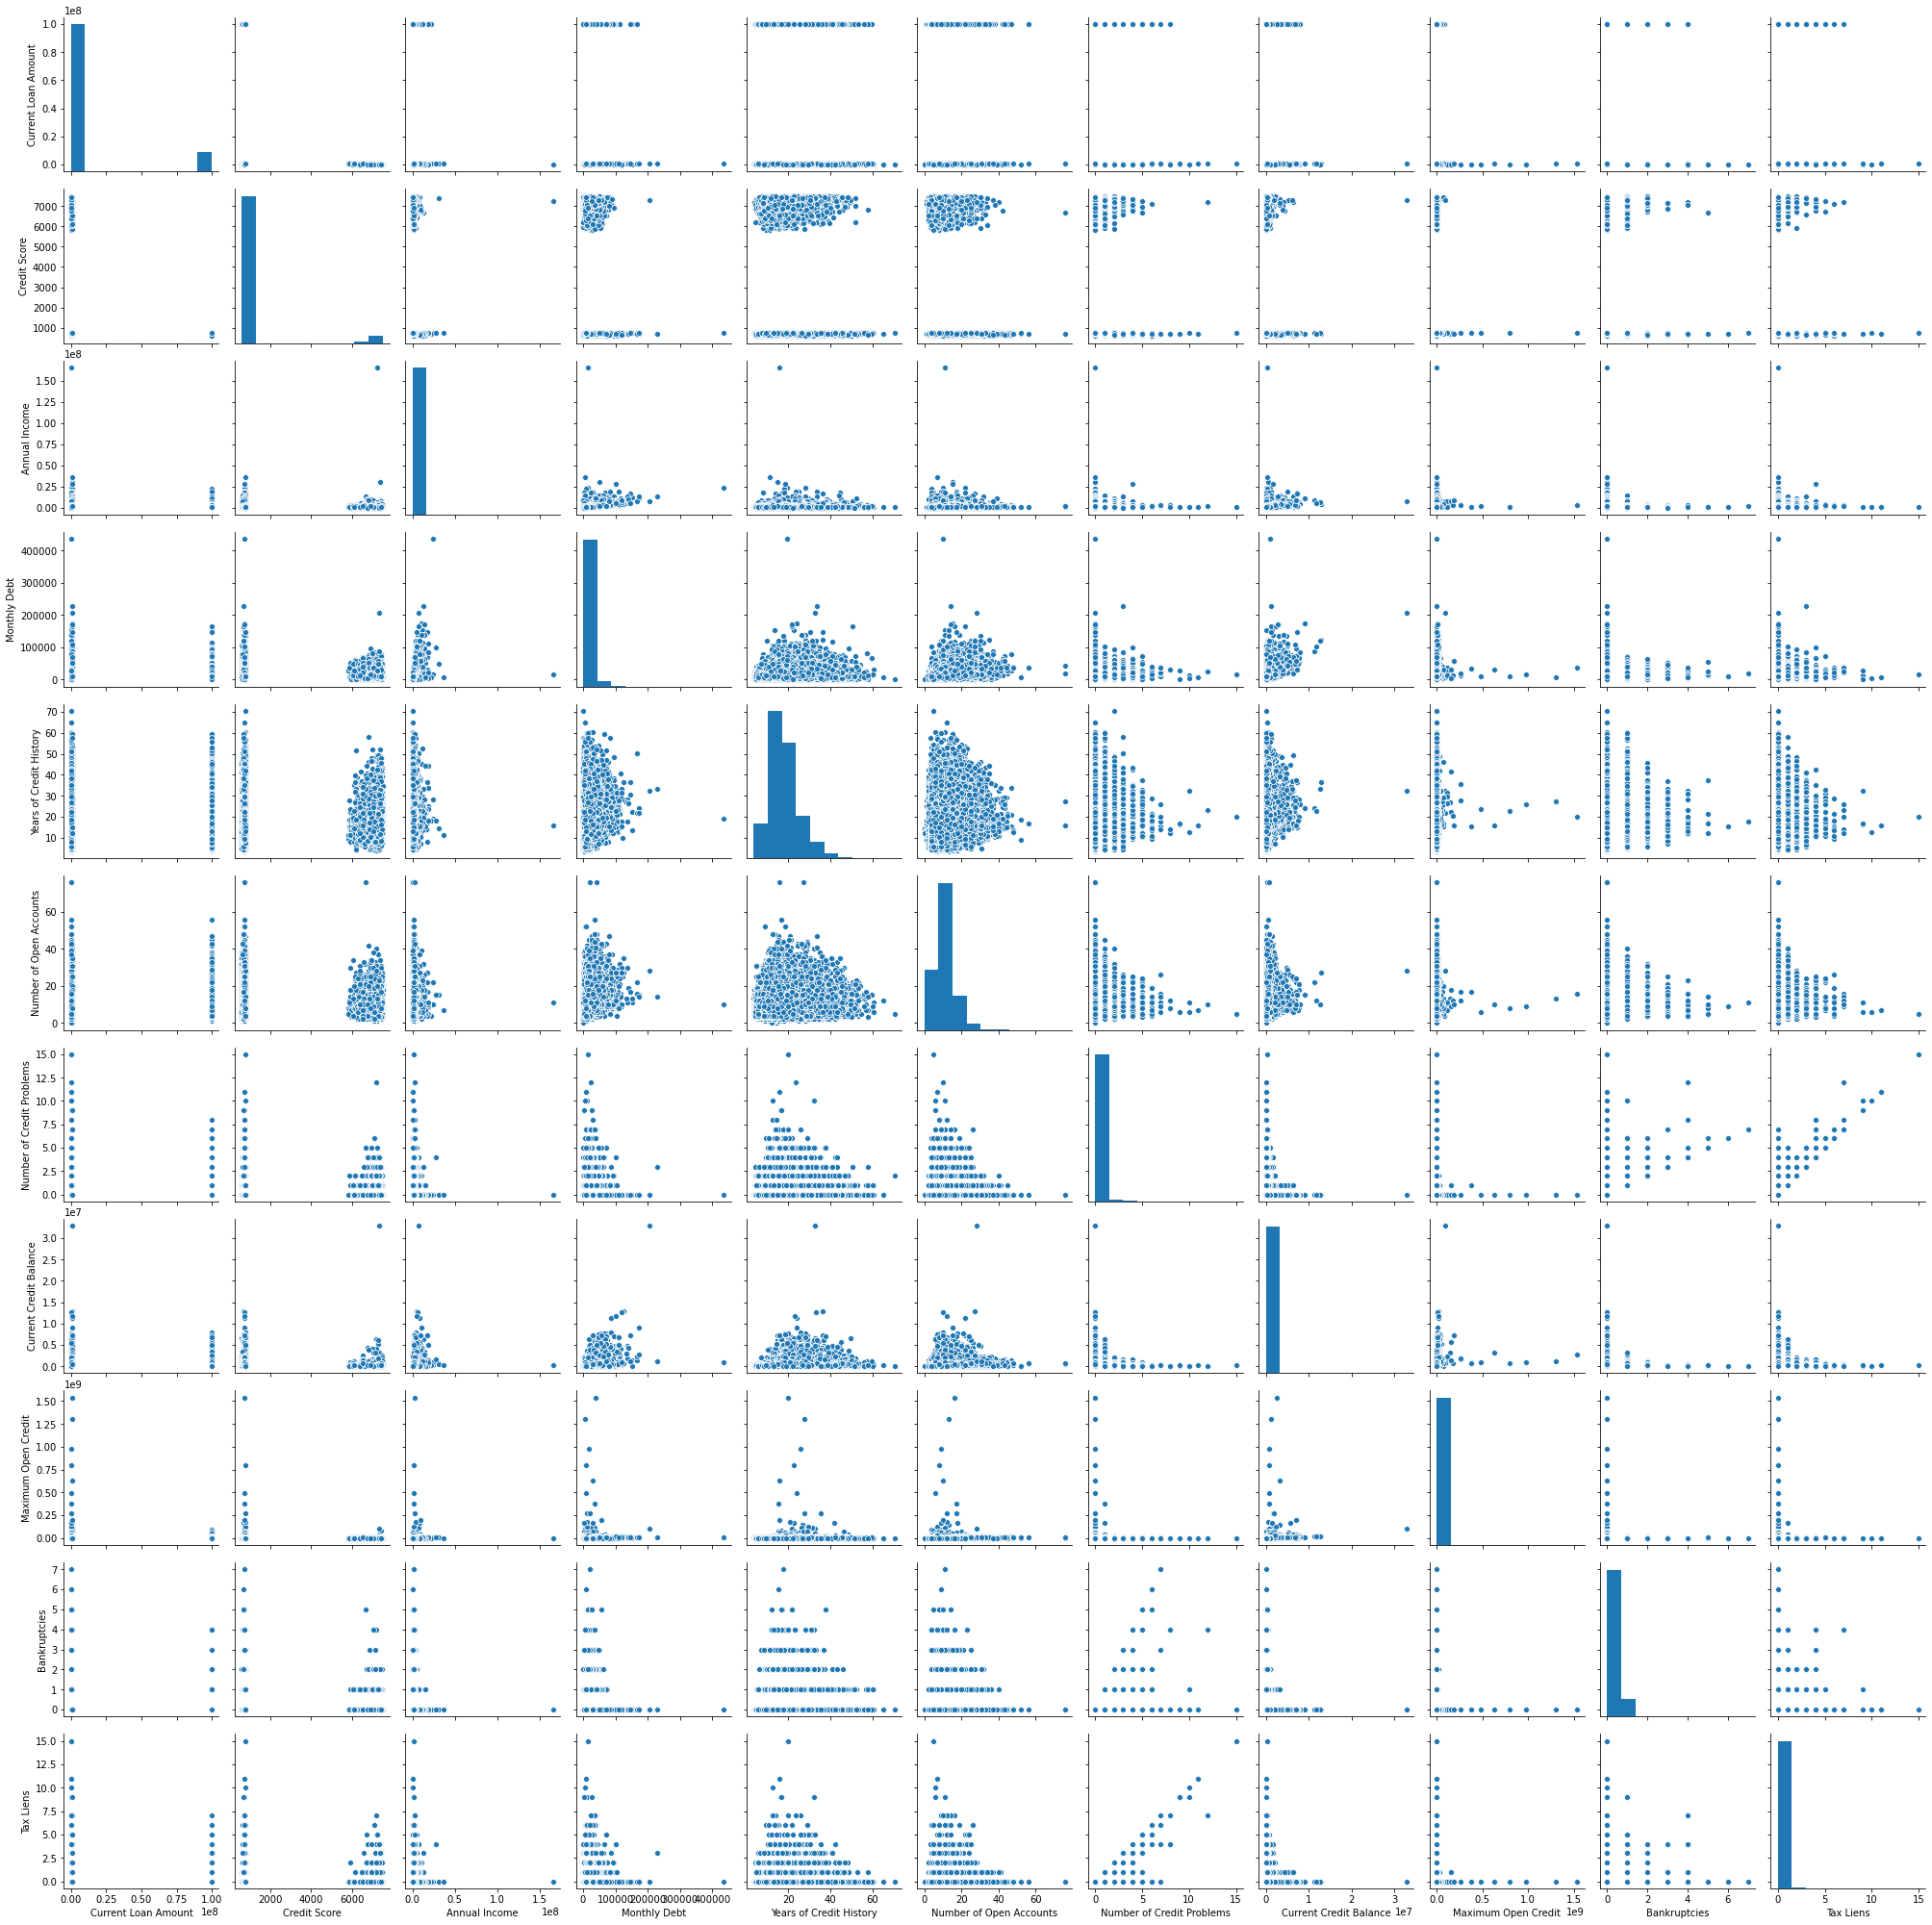

In [9]:
sns.pairplot(df)

In [9]:
df.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 21135
Annual Income                21135
Years in current job          4649
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   226
Tax Liens                       11
dtype: int64

In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [13]:
df['Loan Status'].replace({'Fully Paid': 1, 'Charged Off': 0}, inplace=True)

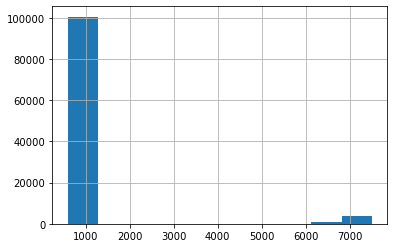

In [14]:
df['Credit Score'].hist()

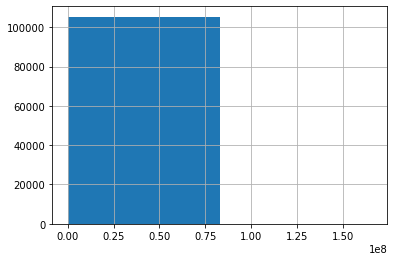

In [15]:
df['Annual Income'].hist(bins=2)

In [16]:
df.dtypes

Loan Status                    int64
Current Loan Amount            int64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job          object
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts        int64
Number of Credit Problems      int64
Current Credit Balance         int64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

In [17]:
df['Years in current job'] = df['Years in current job'].str[0]

In [18]:
df['Years in current job'] = pd.to_numeric(df['Years in current job'], errors='coerce')

In [19]:
df['Years in current job'].fillna(df['Years in current job'].mean(), inplace=True)

In [20]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412,Short Term,709.000000,1.167493e+06,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,1,262328,Short Term,1076.594644,1.377449e+06,1.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,1,99999999,Short Term,741.000000,2.231892e+06,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,1,347666,Long Term,721.000000,8.069490e+05,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,1,176220,Short Term,1076.594644,1.377449e+06,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [21]:
X = df.drop('Loan Status', axis='columns')
y = df['Loan Status']

In [22]:
y.value_counts()

1    81769
0    23582
Name: Loan Status, dtype: int64

In [23]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Term','Home Ownership','Purpose']),
remainder='passthrough')

In [24]:
X = column_trans.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [26]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Test 1: Logistic Regression

In [27]:
clf = LogisticRegression().fit(X_train, y_train)

C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
y_pred = clf.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.19      0.32      7598
           1       0.82      1.00      0.90     27168

    accuracy                           0.82     34766
   macro avg       0.87      0.59      0.61     34766
weighted avg       0.84      0.82      0.77     34766

[[ 1459  6139]
 [  114 27054]]


In [30]:
scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')

C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [31]:
mse = mean_squared_error(y_pred, y_test)

In [32]:
rmse = math.sqrt(mse)
print(rmse)

0.42409861232353196


# Model Test 2: SVC

In [33]:
clf2 = svm.SVC(kernel='sigmoid').fit(X_train, y_train)

In [34]:
y_pred2 = clf2.predict(X_test)

In [35]:
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.29      0.30      0.30      7598
           1       0.80      0.80      0.80     27168

    accuracy                           0.69     34766
   macro avg       0.55      0.55      0.55     34766
weighted avg       0.69      0.69      0.69     34766

[[ 2280  5318]
 [ 5517 21651]]


In [36]:
scores = cross_val_score(clf2, X_test, y_test, cv=10, scoring='accuracy')

In [37]:
mse2 = mean_squared_error(y_pred2, y_test)
print(mse2)

0.31165506529367776


In [38]:
rmse2 = math.sqrt(mse2)
print(rmse2)

0.5582607502714818


# Model Test 3: Random Forest

In [39]:
clf3 = RandomForestClassifier(max_depth=10)
clf3.fit(X_test, y_test)

RandomForestClassifier(max_depth=10)

In [40]:
y_pred3 = clf3.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.20      0.32      7598
           1       0.82      1.00      0.90     27168

    accuracy                           0.82     34766
   macro avg       0.88      0.60      0.61     34766
weighted avg       0.84      0.82      0.77     34766

[[ 1483  6115]
 [   96 27072]]


In [42]:
scores = cross_val_score(clf3, X, y, cv=10, scoring='accuracy')

In [43]:
mse3 = mean_squared_error(y_pred3, y_test)
print(mse3)

0.17865155611804637


In [44]:
rmse3 = math.sqrt(mse3)
print(rmse3)

0.42267192492291983


In [71]:
print(r2_score(y_pred3, y_test))

-2.8978076189331


# Predictions on Unknown Data

In [47]:
X_new =  [['445412','Short Term','709.000000','1.167493e+06','8.0','Home Mortgage','Home Improvements','5214.74','17.2','6','1','228190','416746.0','1.0','0.0']]

In [55]:
columns = ['Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']

In [57]:
X_new = pd.DataFrame(X_new, columns=columns)

In [58]:
X_new = column_trans.transform(X_new)

In [ ]:
X_new = scaler.fit_transform(X_new)

In [60]:
clf.predict(X_new)

array([1], dtype=int64)